### Indice

* [Trabajo de los datos](#1-borrarid)
    1. [Borra ID + Separa variable dependiente](#1-borrarid)
    2. [División de los datos](#2-dividedatos)
    3. [Vriables constantes](#3-constantes)
    4. [Variables con repeticiones](#4-repeticiones)
    5. [Variables nulas](#5-nulas)
    6. [Variables muy correlacionadas](#6-correlacionadas)
    7. [Variables con baja contribución](#7-bajacontribucion)
    8. [Resumen](#8-resumen)
* [Normalización](#normalizacion)
* [Regresión Lineal](#regresion)
* [Árbol de Decisión](#arbol)

In [130]:
import pandas as pd
import datetime
import numpy as np
import warnings
import time
from itertools import combinations
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.tree import DecisionTreeRegressor

# Carga de datos:
data = pd.read_csv('X_y_train.csv')


In [93]:
warnings.filterwarnings("ignore")
start_time = time.time()

In [94]:
data

,Id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281
0,40497,22.462366,68.340790,0.0,305.0,1.0,8.000000,38.088184,0.0,302.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36089,2.886154,14.533652,0.0,131.0,0.0,1.147692,8.377793,0.0,112.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16765,13.690608,21.448212,1.0,125.0,5.0,4.906077,12.762038,0.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,9841,6.963303,7.443890,0.0,48.0,5.0,2.776758,4.237846,0.0,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2618,123.869190,129.566220,0.0,1065.0,87.0,43.328970,62.774147,0.0,491.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,16981,1.675439,8.113229,0.0,74.0,0.0,0.622807,4.374749,0.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7473,7.598214,9.585806,0.0,76.0,4.0,3.220982,5.443936,0.0,44.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,24771,10.630660,17.882992,1.0,259.0,5.0,4.018276,10.396790,0.0,235.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,41950,0.090756,0.320449,0.0,2.0,0.0,0.040336,0.213147,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,23874,10.630660,17.882992,1.0,259.0,5.0,4.018276,10.396790,0.0,235.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


<a id='1-borrarid'></a>
### 1.- Borramos el ID y separamos la variable dependiente

In [95]:
# borramos el ID 
data = data.drop('Id', axis=1)
dependiente = ['feature_281']
var_names = [x for x in data.columns if x not in dependiente]
X = data[var_names]
y = data[dependiente]
#print('(N,M) en entrenamiento: (' + str(len(X)) +',' + str(len(var_names))+')')
display(Markdown( '**(N,M) en entrenamiento**: ( ' + str(len(X)) +',' + ' '+str(len(var_names))+' )' ))

**(N,M) en entrenamiento**: ( 41917, 280 )

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41917 entries, 0 to 41916
Columns: 281 entries, feature_1 to feature_281
dtypes: float64(281)
memory usage: 89.9 MB


<a id='2-dividedatos'></a>
### 2.- Se dividen los datos

In [97]:
# División datos:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<a id='3-constantes'></a>
### 3.- Se eliminan variables constantes

In [98]:
constantes = []
for var in X[var_names]:
    cant_unique = len(X_train[var].unique())
    if cant_unique == 1:
        constantes.append(var)
#print('Cantidad de variables eliminadas por ser constantes: %.0f' %len(constantes))
variables_sin_constantes = [x for x in X[var_names] if x not in constantes]

display(Markdown( '**Cantidad de variables eliminadas por ser constantes**: %.0f' %len(constantes) ))
if len(constantes) != 0:
    display(Markdown( '*Variables eliminadas*: '+ ' / '.join(constantes) ))

**Cantidad de variables eliminadas por ser constantes**: 4

*Variables eliminadas*: feature_13 / feature_33 / feature_38 / feature_278

<a id='4-repeticiones'></a>
### 4.- Se eliminan variables con repeticiones

In [99]:
equal_features = []
for compare in list(combinations(variables_sin_constantes,2)): #Variables filtradas sin constante.
    is_equal = (X_train[compare[0]]==X_train[compare[1]]).all()
    if is_equal:
            equal_features.append(compare[1])
# print('Cantidad de variables eliminadas por repetición: %.0f' %len(set(equal_features))) 
variables_sin_repeticiones = [x for x in variables_sin_constantes if x not in equal_features]

display(Markdown( '**Cantidad de variables eliminadas por repetición**: %.0f' %len(set(equal_features)) ))
if len(set(equal_features)) != 0:
    display(Markdown( '*Variables eliminadas*: '+ ' / '.join(equal_features) ))

**Cantidad de variables eliminadas por repetición**: 27

*Variables eliminadas*: feature_18 / feature_43 / feature_73 / feature_76 / feature_80 / feature_81 / feature_94 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_76 / feature_80 / feature_81 / feature_94 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_80 / feature_81 / feature_94 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_81 / feature_94 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_94 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_97 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_124 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_130 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_132 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_149 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_155 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_156 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_161 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_166 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_169 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_172 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_179 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_190 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_198 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_200 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_212 / feature_223 / feature_236 / feature_243 / feature_250 / feature_223 / feature_236 / feature_243 / feature_250 / feature_236 / feature_243 / feature_250 / feature_243 / feature_250 / feature_250

<a id='5-nulas'></a>
### 5.- Se eliminan varibles nulas

In [100]:
nulos = []
for var in variables_sin_repeticiones:
    if X_train[var].isnull().sum() / len(X) > 0.045:
        nulos.append(var)
#print('Cantidad de variables eliminadas por nulas: %.0f' %len(nulos)) 
variables_sin_nulos = [x for x in variables_sin_repeticiones if x not in nulos]

display(Markdown( '**Cantidad de variables eliminadas por nulas**: %.0f' %len(nulos) ))
if len(nulos) != 0:
    display(Markdown( '*Variables eliminadas*: '+ ' / '.join(equal_features) ))

**Cantidad de variables eliminadas por nulas**: 0

<a id='6-correlacionadas'></a>
### 6.- Se eliminan variables muy correlacionadas
Acá tengo dudas, porque esto se podría mejorar viendo lo de la última clase

In [101]:
correlation = X_train.corr()
correlaciones = pd.DataFrame(columns=['v1','v2','c1','c2','c'])

for i in range(len(correlation.index)):
    for j in range(len(correlation.index)):
        if j < i:
            if np.abs(correlation.iloc[i,j]) > 0.8:
                cor_i = np.corrcoef(X_train[correlation.index[i]].values,y_train.values.ravel())[0,1]        
                cor_j = np.corrcoef(X_train[correlation.index[j]].values,y_train.values.ravel())[0,1]  
                if np.abs(cor_i) > np.abs(cor_j):
                    correlaciones.loc[len(correlaciones)]= [correlation.index[i], correlation.index[j], cor_i, cor_j, np.abs(correlation.iloc[i,j])]
                else:
                    correlaciones.loc[len(correlaciones)]= [correlation.index[j], correlation.index[i], cor_j, cor_i, np.abs(correlation.iloc[i,j])]
        else:
            break
correlaciones = correlaciones.sort_values(by=['c'], ascending=False)
#print('Cantidad de variables eliminadas por estar correlacionadas: %.0f' %len(correlaciones['v2'].unique()))
variables_sin_corr = [x for x in variables_sin_nulos if x not in correlaciones['v2'].unique()]




display(Markdown( '**Cantidad de variables eliminadas por estar correlacionadas**: %.0f' %(len(variables_sin_nulos) - len(variables_sin_corr)) ))
if (len(variables_sin_nulos) - len(variables_sin_corr)) != 0:
    display(Markdown( '*Variables eliminadas*: '+ ' / '.join([x for x in correlaciones['v2'].unique() if x in variables_sin_nulos]) ))
    
# Principalmente pueden corresponder a palabras que siempre van juntas, como artículos u otros
# Del 63 al 262 son palabra smás repetidas

**Cantidad de variables eliminadas por estar correlacionadas**: 41

*Variables eliminadas*: feature_39 / feature_32 / feature_7 / feature_31 / feature_26 / feature_1 / feature_24 / feature_9 / feature_12 / feature_11 / feature_20 / feature_49 / feature_42 / feature_37 / feature_16 / feature_41 / feature_44 / feature_48 / feature_2 / feature_17 / feature_27 / feature_56 / feature_15 / feature_5 / feature_19 / feature_51 / feature_29 / feature_23 / feature_47 / feature_22 / feature_14 / feature_45 / feature_30 / feature_6 / feature_21 / feature_4 / feature_35 / feature_280 / feature_65 / feature_34 / feature_143

<a id='7-bajacontribucion'></a>
### 7.- Se eliminan variables con baja contruibucion

In [102]:
baja_contribucion = []
for var in variables_sin_corr:
    if np.abs(np.corrcoef(X_train[var].values,y_train.values.ravel())[0,1])  < 0.05:
        baja_contribucion.append(var)
# print('Variables eliminadas por baja contribución: %.0f' %len(baja_contribucion))
variables_sin_bajacont = [x for x in variables_sin_corr if x not in baja_contribucion]

display(Markdown( '**Variables eliminadas por baja contribución**: %.0f' %len(baja_contribucion) ))
if len(baja_contribucion) != 0:
    display(Markdown( '*Variables eliminadas*: '+ ' / '.join(baja_contribucion) ))

**Variables eliminadas por baja contribución**: 181

*Variables eliminadas*: feature_25 / feature_28 / feature_40 / feature_50 / feature_62 / feature_63 / feature_64 / feature_66 / feature_68 / feature_70 / feature_71 / feature_72 / feature_74 / feature_75 / feature_77 / feature_78 / feature_79 / feature_82 / feature_83 / feature_84 / feature_85 / feature_86 / feature_87 / feature_88 / feature_89 / feature_90 / feature_91 / feature_92 / feature_93 / feature_95 / feature_96 / feature_98 / feature_99 / feature_100 / feature_103 / feature_104 / feature_105 / feature_106 / feature_107 / feature_108 / feature_109 / feature_110 / feature_111 / feature_112 / feature_113 / feature_114 / feature_115 / feature_116 / feature_117 / feature_118 / feature_119 / feature_120 / feature_121 / feature_122 / feature_123 / feature_125 / feature_126 / feature_127 / feature_128 / feature_129 / feature_131 / feature_133 / feature_134 / feature_135 / feature_136 / feature_137 / feature_138 / feature_140 / feature_141 / feature_142 / feature_144 / feature_145 / feature_146 / feature_147 / feature_148 / feature_150 / feature_151 / feature_152 / feature_153 / feature_157 / feature_159 / feature_160 / feature_162 / feature_163 / feature_164 / feature_165 / feature_167 / feature_168 / feature_170 / feature_171 / feature_173 / feature_174 / feature_175 / feature_176 / feature_177 / feature_178 / feature_180 / feature_181 / feature_182 / feature_183 / feature_184 / feature_185 / feature_186 / feature_187 / feature_188 / feature_189 / feature_191 / feature_192 / feature_193 / feature_195 / feature_196 / feature_197 / feature_199 / feature_201 / feature_202 / feature_203 / feature_204 / feature_205 / feature_206 / feature_207 / feature_208 / feature_209 / feature_211 / feature_214 / feature_215 / feature_216 / feature_217 / feature_218 / feature_219 / feature_220 / feature_221 / feature_222 / feature_224 / feature_225 / feature_226 / feature_227 / feature_228 / feature_229 / feature_230 / feature_231 / feature_233 / feature_234 / feature_235 / feature_237 / feature_238 / feature_239 / feature_240 / feature_241 / feature_242 / feature_244 / feature_245 / feature_247 / feature_249 / feature_251 / feature_252 / feature_253 / feature_254 / feature_255 / feature_256 / feature_257 / feature_258 / feature_259 / feature_260 / feature_261 / feature_262 / feature_263 / feature_264 / feature_265 / feature_266 / feature_267 / feature_268 / feature_269 / feature_270 / feature_271 / feature_272 / feature_273 / feature_274 / feature_275 / feature_276 / feature_277 / feature_279

In [103]:
variables_sin_bajacont

['feature_3',
 'feature_8',
 'feature_10',
 'feature_36',
 'feature_46',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_67',
 'feature_69',
 'feature_101',
 'feature_102',
 'feature_139',
 'feature_154',
 'feature_158',
 'feature_194',
 'feature_210',
 'feature_213',
 'feature_232',
 'feature_246',
 'feature_248']

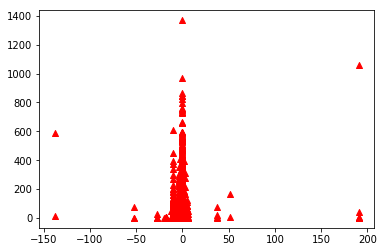

In [104]:
plt.scatter(X_train[baja_contribucion[0]], y_train, marker='^', c='r')
plt.show()

In [105]:
# print('******* RESUMEN:')
# print('* INICIALES: %.0f' %len(X[var_names]))
# print('Eliminadas por ser constantes: %.0f' %len(constantes))
# print('Eliminadas por repetición: %.0f' %len(set(equal_features))) 
# print('Eliminadas por nulas: %.0f' %len(nulos)) 
# print('Eliminadas por estar correlacionadas: %.0f' %len(correlaciones['v2'].unique())) 
# print('Eliminadas por baja contribución: %.0f' %len(baja_contribucion))
# print('* FINALES: %.0f' %len(variables_sin_bajacont))

display(Markdown( "<a id='8-resumen'></a>" ))
display(Markdown('### 8.- Resumen:'))
display(Markdown('**INICIALES**: %.0f' %len(X[var_names])))
display(Markdown('*Eliminadas por ser constantes*: %.0f' %len(constantes)))
display(Markdown('*Eliminadas por repetición*: %.0f' %len(set(equal_features))) )
display(Markdown('*Eliminadas por nulas*: %.0f' %len(nulos)) )
display(Markdown('*Eliminadas por estar correlacionadas*: %.0f' %(len(variables_sin_nulos) - len(variables_sin_corr)) ) )
display(Markdown('*Eliminadas por baja contribución*: %.0f' %len(baja_contribucion)))
display(Markdown('**FINALES**: %.0f' %len(variables_sin_bajacont)))

<a id='8-resumen'></a>

### 8.- Resumen:

**INICIALES**: 41917

*Eliminadas por ser constantes*: 4

*Eliminadas por repetición*: 27

*Eliminadas por nulas*: 0

*Eliminadas por estar correlacionadas*: 41

*Eliminadas por baja contribución*: 181

**FINALES**: 27

<a id='normalizacion'></a>
## Normalizacion de los datos

In [111]:
from sklearn.preprocessing import Imputer
X_train = X_train[variables_sin_bajacont]
X_test = X_test[variables_sin_bajacont]
norm_mean = preprocessing.StandardScaler().fit(X_train)
X_norm = pd.DataFrame(norm_mean.transform(X_train), 
                            columns = variables_sin_bajacont)
X_norm_test = pd.DataFrame(norm_mean.transform(X_test), 
                           columns = variables_sin_bajacont)


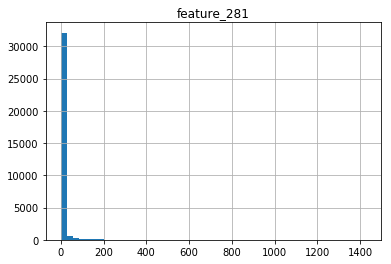

,feature_281
count,41917.000000
mean,6.866116
std,38.385340
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,1424.000000


In [42]:
hist =  y_train.hist(bins=50)
plt.show()
y.describe()

<a id='regresion'></a>
### REGRESION LINEAL

In [43]:
lr =  ElasticNet(random_state=0)
params ={'l1_ratio':[0,0.2,0.5,0.8,1], 'alpha':[0,0.1,1]}
# Verbose para saber en qué está el proceso, menos incertidumbre
# reg = GridSearchCV(lr, params, scoring = 'neg_median_absolute_error', cv = 10,  verbose=2)
reg = GridSearchCV(lr, params, scoring = 'neg_median_absolute_error', cv = 10,  verbose=0)
reg.fit(X_norm, y_train)

display(Markdown('**L1_Ratio**: ' +str(reg.best_params_['l1_ratio'])))
display(Markdown('**Penalty Alpha**: ' +str(reg.best_params_['alpha'])))

#print('L1_Ratio: ' +str(reg.best_params_['l1_ratio']))
#print('Penalty Alpha: ' +str(reg.best_params_['alpha']))

**L1_Ratio**: 0.8

**Penalty Alpha**: 1

#### SE GUARDA EL MODELO 

In [44]:
# Guardamos modelo serializado:
lr =  ElasticNet(l1_ratio = reg.best_params_['l1_ratio'], alpha = reg.best_params_['alpha'], random_state=0)
lr.fit(X_norm, y_train)

filename = 'rl.sav'
pickle.dump(lr, open(filename, 'wb'))

#print('MAE en entrenamiento: %.2f' %mean_absolute_error(lr.predict(X_norm),y_train))
#print("--- %s seconds ---" % (time.time() - start_time))

display(Markdown('**MAE en entrenamiento**: %.2f' %mean_absolute_error(lr.predict(X_norm),y_train)+ " *(%s seconds)*" % (time.time() - start_time)))

**MAE en entrenamiento**: 8.41 *(69.81243658065796 seconds)*

<a id='arbol'></a>
### ARBOL 

In [45]:
dt =  DecisionTreeRegressor(random_state=0)
#params ={'max_depth':[5,10,20,40,80], 'min_samples_leaf':[0.01,0.05,0.1,0.2] , 'criterion': ["mae", "mse"]}
params ={'max_depth':[5,10,20,40,80], 'min_samples_leaf':[0.01,0.05,0.1,0.2], "max_leaf_nodes": [5, 20, 100] }
#reg = GridSearchCV(dt, params, scoring = 'neg_median_absolute_error', cv = 20, verbose = 2)
reg = GridSearchCV(dt, params, scoring = 'neg_median_absolute_error', cv = 20)
reg.fit(X_train, y_train) # Se hace sobre datos normales, apropiado para dt.

#print('Profundidad: ' +str(reg.best_params_['max_depth']))
#print('Mínimo muestra en hoja: ' +str(reg.best_params_['min_samples_leaf']))

display(Markdown( '**Profundidad**: ' +str(reg.best_params_['max_depth']) ))
display(Markdown( '**Mínimo muestra en hoja**: ' +str(reg.best_params_['min_samples_leaf']) ))
display(Markdown( '**Maxima cantidad de hojas finales**: ' +str(reg.best_params_['max_leaf_nodes']) ))
#display(Markdown( '**Criterion**: ' +str(reg.best_params_['criterion']) ))


**Profundidad**: 10

**Mínimo muestra en hoja**: 0.01

**Maxima cantidad de hojas finales**: 20

In [46]:
#Modelo serializado:
dt = DecisionTreeRegressor(random_state=0, max_depth=reg.best_params_['max_depth'],
                               min_samples_leaf=reg.best_params_['min_samples_leaf'], max_leaf_nodes=reg.best_params_['max_leaf_nodes'])

dt.fit(X_train, y_train)
filename = 'dt.sav'
pickle.dump(dt, open(filename, 'wb'))

#print('MAE en entrenamiento: %.2f' %mean_absolute_error(dt.predict(X_train),y_train))
#print("--- %s seconds ---" % (time.time() - start_time))

display(Markdown('**MAE en entrenamiento**: %.2f' %mean_absolute_error(dt.predict(X_train),y_train)+ " *(%s seconds)*" % (time.time() - start_time)))

**MAE en entrenamiento**: 7.33 *(214.26834321022034 seconds)*

RED NEURONAL

In [69]:
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.initializers import he_normal 
from sklearn.utils import class_weight

def Red_Neuronal(optimizer = 'Adam', activation='elu' ):
    keras.backend.clear_session()
    nn = Sequential()

    #Capa 1:
    nn.add(Dense(len(variables_sin_bajacont), input_dim=len(variables_sin_bajacont), kernel_initializer=he_normal()))
    nn.add(Activation(activation))
    nn.add(Dropout(0.3))

    #Capa 2:
    nn.add(Dense(len(variables_sin_bajacont), kernel_initializer=he_normal()))
    nn.add(Activation(activation))
    nn.add(Dropout(0.1))

    #Capa 2:
    nn.add(Dense(len(variables_sin_bajacont), kernel_initializer=he_normal()))
    nn.add(Activation(activation))
    nn.add(Dropout(0.1))

    #Capa 4 - Final:
    nn.add(Dense(1))
    nn.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mae", "accuracy"])
    nn.summary()

    return nn

CREAMOS RED 

In [76]:
from keras.wrappers.scikit_learn import KerasClassifier
nn1 = KerasClassifier(build_fn=Red_Neuronal)

Se determinan los hyperparametros para la red neuronal

In [112]:
#early stopping y checkpoint para guardar la mejor configuación
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
stopped = EarlyStopping(monitor='val_loss', verbose=1, patience=50,min_delta=1e-7, mode='min', baseline=0.18,restore_best_weights=False )
best_model = ModelCheckpoint(filepath='Best_NN.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [115]:
from sklearn.model_selection import GridSearchCV
parameter = {'optimizer' : ['Nadam', 'Adam'  ],
            'activation' : ['relu', 'elu'],
            'epochs':[150,100]}

clf1 =  GridSearchCV(estimator=nn1, param_grid=parameter, cv=2)
NN_2=clf1.fit(X_train, y_train, validation_data=(X_norm_test,y_test),
                    batch_size=32, verbose=1, callbacks=[stopped,best_model])

print('Optimizer escogido: ' +str(NN_2.best_params_['optimizer']))
print('Función de activación escogida: ' +str(NN_2.best_params_['activation']))
print('Epochs escogidos: ' +str(NN_2.best_params_['epochs']))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_1 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_2 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 27)                756       
__________

16766/16766 [==============================] - 1s 35us/step - loss: 4.2979 - mean_absolute_error: 4.2979 - acc: 0.6167 - val_loss: 6.8892 - val_mean_absolute_error: 6.8892 - val_acc: 0.6256

Epoch 00026: val_loss did not improve from 6.81411
Epoch 27/150
16766/16766 [==============================] - 1s 32us/step - loss: 4.2182 - mean_absolute_error: 4.2182 - acc: 0.6198 - val_loss: 6.9050 - val_mean_absolute_error: 6.9050 - val_acc: 0.6252

Epoch 00027: val_loss did not improve from 6.81411
Epoch 28/150
16766/16766 [==============================] - 1s 37us/step - loss: 4.2868 - mean_absolute_error: 4.2868 - acc: 0.6201 - val_loss: 6.8885 - val_mean_absolute_error: 6.8885 - val_acc: 0.6261

Epoch 00028: val_loss did not improve from 6.81411
Epoch 29/150
16766/16766 [==============================] - 1s 36us/step - loss: 4.2371 - mean_absolute_error: 4.2371 - acc: 0.6212 - val_loss: 6.8843 - val_mean_absolute_error: 6.8843 - val_acc: 0.6252

Epoch 00029: val_loss did not improve from 6

16767/16767 [==============================] - 1s 50us/step - loss: 6.1075 - mean_absolute_error: 6.1075 - acc: 0.4621 - val_loss: 7.0356 - val_mean_absolute_error: 7.0356 - val_acc: 0.5782

Epoch 00001: val_loss did not improve from 6.81411
Epoch 2/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.7952 - mean_absolute_error: 4.7952 - acc: 0.6071 - val_loss: 7.0150 - val_mean_absolute_error: 7.0150 - val_acc: 0.5229

Epoch 00002: val_loss did not improve from 6.81411
Epoch 3/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.7740 - mean_absolute_error: 4.7740 - acc: 0.6079 - val_loss: 6.9888 - val_mean_absolute_error: 6.9888 - val_acc: 0.4597

Epoch 00003: val_loss did not improve from 6.81411
Epoch 4/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.6394 - mean_absolute_error: 4.6394 - acc: 0.6121 - val_loss: 6.9384 - val_mean_absolute_error: 6.9384 - val_acc: 0.5600

Epoch 00004: val_loss did not improve from 6.81

16767/16767 [==============================] - 1s 33us/step - loss: 4.2624 - mean_absolute_error: 4.2624 - acc: 0.6205 - val_loss: 6.9594 - val_mean_absolute_error: 6.9594 - val_acc: 0.6132

Epoch 00033: val_loss did not improve from 6.81411
Epoch 34/150
16767/16767 [==============================] - 1s 32us/step - loss: 4.3055 - mean_absolute_error: 4.3055 - acc: 0.6219 - val_loss: 6.9725 - val_mean_absolute_error: 6.9725 - val_acc: 0.6091

Epoch 00034: val_loss did not improve from 6.81411
Epoch 35/150
16767/16767 [==============================] - 1s 32us/step - loss: 4.2753 - mean_absolute_error: 4.2753 - acc: 0.6222 - val_loss: 6.9779 - val_mean_absolute_error: 6.9779 - val_acc: 0.6108

Epoch 00035: val_loss did not improve from 6.81411
Epoch 36/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.3360 - mean_absolute_error: 4.3360 - acc: 0.6197 - val_loss: 7.0619 - val_mean_absolute_error: 7.0619 - val_acc: 0.6040

Epoch 00036: val_loss did not improve from 6

16766/16766 [==============================] - 1s 33us/step - loss: 4.4162 - mean_absolute_error: 4.4162 - acc: 0.6094 - val_loss: 6.9554 - val_mean_absolute_error: 6.9554 - val_acc: 0.5033

Epoch 00008: val_loss did not improve from 6.81411
Epoch 9/150
16766/16766 [==============================] - 1s 32us/step - loss: 4.4010 - mean_absolute_error: 4.4010 - acc: 0.6121 - val_loss: 6.9415 - val_mean_absolute_error: 6.9415 - val_acc: 0.5187

Epoch 00009: val_loss did not improve from 6.81411
Epoch 10/150
16766/16766 [==============================] - 1s 31us/step - loss: 4.4100 - mean_absolute_error: 4.4100 - acc: 0.6124 - val_loss: 6.9278 - val_mean_absolute_error: 6.9278 - val_acc: 0.5171

Epoch 00010: val_loss did not improve from 6.81411
Epoch 11/150
16766/16766 [==============================] - 1s 35us/step - loss: 4.2974 - mean_absolute_error: 4.2974 - acc: 0.6110 - val_loss: 6.9210 - val_mean_absolute_error: 6.9210 - val_acc: 0.5228

Epoch 00011: val_loss did not improve from 6.

16766/16766 [==============================] - 1s 32us/step - loss: 4.1796 - mean_absolute_error: 4.1796 - acc: 0.6115 - val_loss: 6.8648 - val_mean_absolute_error: 6.8648 - val_acc: 0.5432

Epoch 00040: val_loss did not improve from 6.81411
Epoch 41/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.2263 - mean_absolute_error: 4.2263 - acc: 0.6146 - val_loss: 6.8677 - val_mean_absolute_error: 6.8677 - val_acc: 0.5303

Epoch 00041: val_loss did not improve from 6.81411
Epoch 42/150
16766/16766 [==============================] - 1s 33us/step - loss: 4.1614 - mean_absolute_error: 4.1614 - acc: 0.6112 - val_loss: 6.8786 - val_mean_absolute_error: 6.8786 - val_acc: 0.5230

Epoch 00042: val_loss did not improve from 6.81411
Epoch 43/150
16766/16766 [==============================] - 1s 35us/step - loss: 4.2128 - mean_absolute_error: 4.2128 - acc: 0.6165 - val_loss: 6.8835 - val_mean_absolute_error: 6.8835 - val_acc: 0.5227

Epoch 00043: val_loss did not improve from 6

16767/16767 [==============================] - 1s 30us/step - loss: 4.4649 - mean_absolute_error: 4.4649 - acc: 0.6144 - val_loss: 7.2314 - val_mean_absolute_error: 7.2314 - val_acc: 0.3838

Epoch 00015: val_loss did not improve from 6.81411
Epoch 16/150
16767/16767 [==============================] - 1s 31us/step - loss: 4.4646 - mean_absolute_error: 4.4646 - acc: 0.6118 - val_loss: 7.2065 - val_mean_absolute_error: 7.2065 - val_acc: 0.4043

Epoch 00016: val_loss did not improve from 6.81411
Epoch 17/150
16767/16767 [==============================] - 1s 30us/step - loss: 4.4554 - mean_absolute_error: 4.4554 - acc: 0.6117 - val_loss: 7.1796 - val_mean_absolute_error: 7.1796 - val_acc: 0.4105

Epoch 00017: val_loss did not improve from 6.81411
Epoch 18/150
16767/16767 [==============================] - 1s 31us/step - loss: 4.4438 - mean_absolute_error: 4.4438 - acc: 0.6131 - val_loss: 7.1615 - val_mean_absolute_error: 7.1615 - val_acc: 0.4196

Epoch 00018: val_loss did not improve from 6

16767/16767 [==============================] - 1s 30us/step - loss: 4.3507 - mean_absolute_error: 4.3507 - acc: 0.6136 - val_loss: 7.1701 - val_mean_absolute_error: 7.1701 - val_acc: 0.3966

Epoch 00047: val_loss did not improve from 6.81411
Epoch 48/150
16767/16767 [==============================] - 1s 30us/step - loss: 4.2769 - mean_absolute_error: 4.2769 - acc: 0.6148 - val_loss: 7.2340 - val_mean_absolute_error: 7.2340 - val_acc: 0.3944

Epoch 00048: val_loss did not improve from 6.81411
Epoch 49/150
16767/16767 [==============================] - 0s 29us/step - loss: 4.3548 - mean_absolute_error: 4.3548 - acc: 0.6148 - val_loss: 7.1905 - val_mean_absolute_error: 7.1905 - val_acc: 0.4108

Epoch 00049: val_loss did not improve from 6.81411
Epoch 50/150
16767/16767 [==============================] - 1s 30us/step - loss: 4.2528 - mean_absolute_error: 4.2528 - acc: 0.6145 - val_loss: 7.2323 - val_mean_absolute_error: 7.2323 - val_acc: 0.4033

Epoch 00050: val_loss did not improve from 6

16766/16766 [==============================] - 1s 33us/step - loss: 4.2394 - mean_absolute_error: 4.2394 - acc: 0.6217 - val_loss: 6.9318 - val_mean_absolute_error: 6.9318 - val_acc: 0.5720

Epoch 00021: val_loss did not improve from 6.81411
Epoch 22/100
16766/16766 [==============================] - 1s 33us/step - loss: 4.2993 - mean_absolute_error: 4.2993 - acc: 0.6178 - val_loss: 6.9514 - val_mean_absolute_error: 6.9514 - val_acc: 0.5703

Epoch 00022: val_loss did not improve from 6.81411
Epoch 23/100
16766/16766 [==============================] - 1s 33us/step - loss: 4.2364 - mean_absolute_error: 4.2364 - acc: 0.6187 - val_loss: 6.9348 - val_mean_absolute_error: 6.9348 - val_acc: 0.5779

Epoch 00023: val_loss did not improve from 6.81411
Epoch 24/100
16766/16766 [==============================] - 1s 33us/step - loss: 4.2352 - mean_absolute_error: 4.2352 - acc: 0.6180 - val_loss: 6.9499 - val_mean_absolute_error: 6.9499 - val_acc: 0.5698

Epoch 00024: val_loss did not improve from 6

Train on 16767 samples, validate on 8384 samples
Epoch 1/100
16767/16767 [==============================] - 1s 54us/step - loss: 6.4904 - mean_absolute_error: 6.4904 - acc: 0.3967 - val_loss: 7.0583 - val_mean_absolute_error: 7.0583 - val_acc: 0.5694

Epoch 00001: val_loss did not improve from 6.81411
Epoch 2/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.9085 - mean_absolute_error: 4.9085 - acc: 0.5889 - val_loss: 7.0569 - val_mean_absolute_error: 7.0569 - val_acc: 0.5178

Epoch 00002: val_loss did not improve from 6.81411
Epoch 3/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.7576 - mean_absolute_error: 4.7576 - acc: 0.6030 - val_loss: 7.0562 - val_mean_absolute_error: 7.0562 - val_acc: 0.4717

Epoch 00003: val_loss did not improve from 6.81411
Epoch 4/100
16767/16767 [==============================] - 1s 32us/step - loss: 4.6994 - mean_absolute_error: 4.6994 - acc: 0.6074 - val_loss: 7.0794 - val_mean_absolute_error: 7.0794 - val

16767/16767 [==============================] - 1s 37us/step - loss: 4.3364 - mean_absolute_error: 4.3364 - acc: 0.6102 - val_loss: 7.1693 - val_mean_absolute_error: 7.1693 - val_acc: 0.4146

Epoch 00033: val_loss did not improve from 6.81411
Epoch 34/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.3041 - mean_absolute_error: 4.3041 - acc: 0.6166 - val_loss: 7.2014 - val_mean_absolute_error: 7.2014 - val_acc: 0.4117

Epoch 00034: val_loss did not improve from 6.81411
Epoch 35/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.3070 - mean_absolute_error: 4.3070 - acc: 0.6162 - val_loss: 7.3287 - val_mean_absolute_error: 7.3287 - val_acc: 0.4115

Epoch 00035: val_loss did not improve from 6.81411
Epoch 36/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.3122 - mean_absolute_error: 4.3122 - acc: 0.6147 - val_loss: 7.3676 - val_mean_absolute_error: 7.3676 - val_acc: 0.4277

Epoch 00036: val_loss did not improve from 6

16766/16766 [==============================] - 1s 32us/step - loss: 4.5760 - mean_absolute_error: 4.5760 - acc: 0.6120 - val_loss: 7.1554 - val_mean_absolute_error: 7.1554 - val_acc: 0.4251

Epoch 00008: val_loss did not improve from 6.81411
Epoch 9/100
16766/16766 [==============================] - 1s 32us/step - loss: 4.4713 - mean_absolute_error: 4.4713 - acc: 0.6072 - val_loss: 7.1542 - val_mean_absolute_error: 7.1542 - val_acc: 0.4380

Epoch 00009: val_loss did not improve from 6.81411
Epoch 10/100
16766/16766 [==============================] - 1s 32us/step - loss: 4.4647 - mean_absolute_error: 4.4647 - acc: 0.6043 - val_loss: 7.0929 - val_mean_absolute_error: 7.0929 - val_acc: 0.4636

Epoch 00010: val_loss did not improve from 6.81411
Epoch 11/100
16766/16766 [==============================] - 1s 31us/step - loss: 4.4552 - mean_absolute_error: 4.4552 - acc: 0.6099 - val_loss: 7.0857 - val_mean_absolute_error: 7.0857 - val_acc: 0.4667

Epoch 00011: val_loss did not improve from 6.

16766/16766 [==============================] - 1s 32us/step - loss: 4.2382 - mean_absolute_error: 4.2382 - acc: 0.6108 - val_loss: 6.9306 - val_mean_absolute_error: 6.9306 - val_acc: 0.4667

Epoch 00040: val_loss did not improve from 6.81411
Epoch 41/100
16766/16766 [==============================] - 1s 33us/step - loss: 4.1984 - mean_absolute_error: 4.1984 - acc: 0.6119 - val_loss: 6.9313 - val_mean_absolute_error: 6.9313 - val_acc: 0.5109

Epoch 00041: val_loss did not improve from 6.81411
Epoch 42/100
16766/16766 [==============================] - 1s 33us/step - loss: 4.2382 - mean_absolute_error: 4.2382 - acc: 0.6112 - val_loss: 6.9274 - val_mean_absolute_error: 6.9274 - val_acc: 0.5101

Epoch 00042: val_loss did not improve from 6.81411
Epoch 43/100
16766/16766 [==============================] - 1s 32us/step - loss: 4.1764 - mean_absolute_error: 4.1764 - acc: 0.6101 - val_loss: 6.9852 - val_mean_absolute_error: 6.9852 - val_acc: 0.4293

Epoch 00043: val_loss did not improve from 6

16767/16767 [==============================] - 1s 33us/step - loss: 4.4788 - mean_absolute_error: 4.4788 - acc: 0.6086 - val_loss: 6.9579 - val_mean_absolute_error: 6.9579 - val_acc: 0.5012

Epoch 00015: val_loss did not improve from 6.81411
Epoch 16/100
16767/16767 [==============================] - 1s 32us/step - loss: 4.4444 - mean_absolute_error: 4.4444 - acc: 0.6128 - val_loss: 6.9731 - val_mean_absolute_error: 6.9731 - val_acc: 0.5651

Epoch 00016: val_loss did not improve from 6.81411
Epoch 17/100
16767/16767 [==============================] - 1s 35us/step - loss: 4.4655 - mean_absolute_error: 4.4655 - acc: 0.6150 - val_loss: 6.9770 - val_mean_absolute_error: 6.9770 - val_acc: 0.5524

Epoch 00017: val_loss did not improve from 6.81411
Epoch 18/100
16767/16767 [==============================] - 1s 40us/step - loss: 4.4909 - mean_absolute_error: 4.4909 - acc: 0.6083 - val_loss: 6.9330 - val_mean_absolute_error: 6.9330 - val_acc: 0.5273

Epoch 00018: val_loss did not improve from 6

16767/16767 [==============================] - 1s 33us/step - loss: 4.2806 - mean_absolute_error: 4.2806 - acc: 0.6150 - val_loss: 7.0961 - val_mean_absolute_error: 7.0961 - val_acc: 0.5575

Epoch 00047: val_loss did not improve from 6.81411
Epoch 48/100
16767/16767 [==============================] - 1s 32us/step - loss: 4.2899 - mean_absolute_error: 4.2899 - acc: 0.6154 - val_loss: 7.1216 - val_mean_absolute_error: 7.1216 - val_acc: 0.5495

Epoch 00048: val_loss did not improve from 6.81411
Epoch 49/100
16767/16767 [==============================] - 1s 31us/step - loss: 4.2427 - mean_absolute_error: 4.2427 - acc: 0.6158 - val_loss: 7.1354 - val_mean_absolute_error: 7.1354 - val_acc: 0.4381

Epoch 00049: val_loss did not improve from 6.81411
Epoch 50/100
16767/16767 [==============================] - 1s 32us/step - loss: 4.2067 - mean_absolute_error: 4.2067 - acc: 0.6191 - val_loss: 7.1068 - val_mean_absolute_error: 7.1068 - val_acc: 0.5569

Epoch 00050: val_loss did not improve from 6

16766/16766 [==============================] - 1s 39us/step - loss: 4.2743 - mean_absolute_error: 4.2743 - acc: 0.6127 - val_loss: 6.8494 - val_mean_absolute_error: 6.8494 - val_acc: 0.5798

Epoch 00022: val_loss did not improve from 6.81411
Epoch 23/150
16766/16766 [==============================] - 1s 40us/step - loss: 4.2978 - mean_absolute_error: 4.2978 - acc: 0.6142 - val_loss: 6.8551 - val_mean_absolute_error: 6.8551 - val_acc: 0.5720

Epoch 00023: val_loss did not improve from 6.81411
Epoch 24/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.3313 - mean_absolute_error: 4.3313 - acc: 0.6123 - val_loss: 6.8757 - val_mean_absolute_error: 6.8757 - val_acc: 0.5771

Epoch 00024: val_loss did not improve from 6.81411
Epoch 25/150
16766/16766 [==============================] - 1s 38us/step - loss: 4.2954 - mean_absolute_error: 4.2954 - acc: 0.6123 - val_loss: 6.8777 - val_mean_absolute_error: 6.8777 - val_acc: 0.5829

Epoch 00025: val_loss did not improve from 6

Train on 16767 samples, validate on 8384 samples
Epoch 1/150
16767/16767 [==============================] - ETA: 0s - loss: 7.6879 - mean_absolute_error: 7.6879 - acc: 0.314 - 1s 53us/step - loss: 7.4308 - mean_absolute_error: 7.4308 - acc: 0.3293 - val_loss: 7.1660 - val_mean_absolute_error: 7.1660 - val_acc: 0.3426

Epoch 00001: val_loss did not improve from 6.80457
Epoch 2/150
16767/16767 [==============================] - 1s 41us/step - loss: 5.1612 - mean_absolute_error: 5.1612 - acc: 0.5299 - val_loss: 7.0851 - val_mean_absolute_error: 7.0851 - val_acc: 0.4201

Epoch 00002: val_loss did not improve from 6.80457
Epoch 3/150
16767/16767 [==============================] - 1s 38us/step - loss: 4.9068 - mean_absolute_error: 4.9068 - acc: 0.5754 - val_loss: 7.0987 - val_mean_absolute_error: 7.0987 - val_acc: 0.4272

Epoch 00003: val_loss did not improve from 6.80457
Epoch 4/150
16767/16767 [==============================] - 1s 36us/step - loss: 4.7823 - mean_absolute_error: 4.7823 - ac


Epoch 00032: val_loss did not improve from 6.80457
Epoch 33/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.3275 - mean_absolute_error: 4.3275 - acc: 0.6170 - val_loss: 7.6598 - val_mean_absolute_error: 7.6598 - val_acc: 0.5525

Epoch 00033: val_loss did not improve from 6.80457
Epoch 34/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.3182 - mean_absolute_error: 4.3182 - acc: 0.6167 - val_loss: 7.7247 - val_mean_absolute_error: 7.7247 - val_acc: 0.5612

Epoch 00034: val_loss did not improve from 6.80457
Epoch 35/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.2512 - mean_absolute_error: 4.2512 - acc: 0.6190 - val_loss: 7.7192 - val_mean_absolute_error: 7.7192 - val_acc: 0.5580

Epoch 00035: val_loss did not improve from 6.80457
Epoch 36/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.3080 - mean_absolute_error: 4.3080 - acc: 0.6181 - val_loss: 8.0102 - val_mean_absolute_error: 8.010


Epoch 00007: val_loss did not improve from 6.80457
Epoch 8/150
16766/16766 [==============================] - 1s 33us/step - loss: 4.5159 - mean_absolute_error: 4.5159 - acc: 0.5842 - val_loss: 6.9406 - val_mean_absolute_error: 6.9406 - val_acc: 0.5165

Epoch 00008: val_loss did not improve from 6.80457
Epoch 9/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.4827 - mean_absolute_error: 4.4827 - acc: 0.5856 - val_loss: 6.9379 - val_mean_absolute_error: 6.9379 - val_acc: 0.5160

Epoch 00009: val_loss did not improve from 6.80457
Epoch 10/150
16766/16766 [==============================] - 1s 33us/step - loss: 4.3935 - mean_absolute_error: 4.3935 - acc: 0.5884 - val_loss: 6.9205 - val_mean_absolute_error: 6.9205 - val_acc: 0.5153

Epoch 00010: val_loss did not improve from 6.80457
Epoch 11/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.4357 - mean_absolute_error: 4.4357 - acc: 0.5932 - val_loss: 6.9231 - val_mean_absolute_error: 6.9231 


Epoch 00039: val_loss did not improve from 6.78623
Epoch 40/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.1869 - mean_absolute_error: 4.1869 - acc: 0.6115 - val_loss: 6.7956 - val_mean_absolute_error: 6.7956 - val_acc: 0.5963

Epoch 00040: val_loss did not improve from 6.78623
Epoch 41/150
16766/16766 [==============================] - 1s 33us/step - loss: 4.2100 - mean_absolute_error: 4.2100 - acc: 0.6050 - val_loss: 6.8067 - val_mean_absolute_error: 6.8067 - val_acc: 0.5989

Epoch 00041: val_loss did not improve from 6.78623
Epoch 42/150
16766/16766 [==============================] - 1s 32us/step - loss: 4.1517 - mean_absolute_error: 4.1517 - acc: 0.6133 - val_loss: 6.8014 - val_mean_absolute_error: 6.8014 - val_acc: 0.6000

Epoch 00042: val_loss did not improve from 6.78623
Epoch 43/150
16766/16766 [==============================] - 1s 34us/step - loss: 4.1409 - mean_absolute_error: 4.1409 - acc: 0.6072 - val_loss: 6.7981 - val_mean_absolute_error: 6.798

16767/16767 [==============================] - 1s 35us/step - loss: 4.4658 - mean_absolute_error: 4.4658 - acc: 0.6119 - val_loss: 7.0725 - val_mean_absolute_error: 7.0725 - val_acc: 0.5315

Epoch 00014: val_loss did not improve from 6.77880
Epoch 15/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.3989 - mean_absolute_error: 4.3989 - acc: 0.6123 - val_loss: 7.0634 - val_mean_absolute_error: 7.0634 - val_acc: 0.5518

Epoch 00015: val_loss did not improve from 6.77880
Epoch 16/150
16767/16767 [==============================] - 1s 34us/step - loss: 4.4493 - mean_absolute_error: 4.4493 - acc: 0.6147 - val_loss: 7.0785 - val_mean_absolute_error: 7.0785 - val_acc: 0.5519

Epoch 00016: val_loss did not improve from 6.77880
Epoch 17/150
16767/16767 [==============================] - 1s 32us/step - loss: 4.3812 - mean_absolute_error: 4.3812 - acc: 0.6112 - val_loss: 7.1639 - val_mean_absolute_error: 7.1639 - val_acc: 0.5315

Epoch 00017: val_loss did not improve from 6

16767/16767 [==============================] - 1s 33us/step - loss: 4.2745 - mean_absolute_error: 4.2745 - acc: 0.6209 - val_loss: 7.4822 - val_mean_absolute_error: 7.4822 - val_acc: 0.5769

Epoch 00046: val_loss did not improve from 6.77880
Epoch 47/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.2847 - mean_absolute_error: 4.2847 - acc: 0.6197 - val_loss: 7.5842 - val_mean_absolute_error: 7.5842 - val_acc: 0.5740

Epoch 00047: val_loss did not improve from 6.77880
Epoch 48/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.2590 - mean_absolute_error: 4.2590 - acc: 0.6203 - val_loss: 7.6123 - val_mean_absolute_error: 7.6123 - val_acc: 0.5687

Epoch 00048: val_loss did not improve from 6.77880
Epoch 49/150
16767/16767 [==============================] - 1s 33us/step - loss: 4.2053 - mean_absolute_error: 4.2053 - acc: 0.6176 - val_loss: 7.6860 - val_mean_absolute_error: 7.6860 - val_acc: 0.5693

Epoch 00049: val_loss did not improve from 6

16766/16766 [==============================] - 1s 34us/step - loss: 4.2944 - mean_absolute_error: 4.2944 - acc: 0.6109 - val_loss: 6.7953 - val_mean_absolute_error: 6.7953 - val_acc: 0.5787

Epoch 00021: val_loss did not improve from 6.77880
Epoch 22/100
16766/16766 [==============================] - 1s 35us/step - loss: 4.2423 - mean_absolute_error: 4.2423 - acc: 0.6097 - val_loss: 6.7992 - val_mean_absolute_error: 6.7992 - val_acc: 0.5930

Epoch 00022: val_loss did not improve from 6.77880
Epoch 23/100
16766/16766 [==============================] - 1s 34us/step - loss: 4.2867 - mean_absolute_error: 4.2867 - acc: 0.6100 - val_loss: 6.8458 - val_mean_absolute_error: 6.8458 - val_acc: 0.6125

Epoch 00023: val_loss did not improve from 6.77880
Epoch 24/100
16766/16766 [==============================] - 1s 36us/step - loss: 4.2515 - mean_absolute_error: 4.2515 - acc: 0.6096 - val_loss: 6.7858 - val_mean_absolute_error: 6.7858 - val_acc: 0.5910

Epoch 00024: val_loss did not improve from 6

activation_1 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_2 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_3 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 27)                0         
__________


Epoch 00027: val_loss did not improve from 6.74584
Epoch 28/100
16767/16767 [==============================] - 1s 35us/step - loss: 4.2989 - mean_absolute_error: 4.2989 - acc: 0.6153 - val_loss: 7.6872 - val_mean_absolute_error: 7.6872 - val_acc: 0.5701

Epoch 00028: val_loss did not improve from 6.74584
Epoch 29/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.3687 - mean_absolute_error: 4.3687 - acc: 0.6167 - val_loss: 7.2464 - val_mean_absolute_error: 7.2464 - val_acc: 0.5844

Epoch 00029: val_loss did not improve from 6.74584
Epoch 30/100
16767/16767 [==============================] - 1s 35us/step - loss: 4.3010 - mean_absolute_error: 4.3010 - acc: 0.6182 - val_loss: 7.4201 - val_mean_absolute_error: 7.4201 - val_acc: 0.5816

Epoch 00030: val_loss did not improve from 6.74584
Epoch 31/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.3386 - mean_absolute_error: 4.3386 - acc: 0.6190 - val_loss: 7.2986 - val_mean_absolute_error: 7.298

16766/16766 [==============================] - 1s 35us/step - loss: 5.3644 - mean_absolute_error: 5.3644 - acc: 0.4469 - val_loss: 7.1739 - val_mean_absolute_error: 7.1739 - val_acc: 0.4407

Epoch 00002: val_loss did not improve from 6.74584
Epoch 3/100
16766/16766 [==============================] - 1s 33us/step - loss: 5.0329 - mean_absolute_error: 5.0329 - acc: 0.5268 - val_loss: 7.1158 - val_mean_absolute_error: 7.1158 - val_acc: 0.4467

Epoch 00003: val_loss did not improve from 6.74584
Epoch 4/100
16766/16766 [==============================] - 1s 35us/step - loss: 4.8204 - mean_absolute_error: 4.8204 - acc: 0.5570 - val_loss: 7.0194 - val_mean_absolute_error: 7.0194 - val_acc: 0.4789

Epoch 00004: val_loss did not improve from 6.74584
Epoch 5/100
16766/16766 [==============================] - 1s 32us/step - loss: 4.6553 - mean_absolute_error: 4.6553 - acc: 0.5770 - val_loss: 6.9951 - val_mean_absolute_error: 6.9951 - val_acc: 0.4918

Epoch 00005: val_loss did not improve from 6.74

16766/16766 [==============================] - 1s 34us/step - loss: 4.2702 - mean_absolute_error: 4.2702 - acc: 0.6120 - val_loss: 6.8963 - val_mean_absolute_error: 6.8963 - val_acc: 0.5550

Epoch 00034: val_loss did not improve from 6.74584
Epoch 35/100
16766/16766 [==============================] - 1s 35us/step - loss: 4.1959 - mean_absolute_error: 4.1959 - acc: 0.6095 - val_loss: 6.9112 - val_mean_absolute_error: 6.9112 - val_acc: 0.5564

Epoch 00035: val_loss did not improve from 6.74584
Epoch 36/100
16766/16766 [==============================] - 1s 31us/step - loss: 4.1825 - mean_absolute_error: 4.1825 - acc: 0.6040 - val_loss: 6.9215 - val_mean_absolute_error: 6.9215 - val_acc: 0.5545

Epoch 00036: val_loss did not improve from 6.74584
Epoch 37/100
16766/16766 [==============================] - 1s 34us/step - loss: 4.1787 - mean_absolute_error: 4.1787 - acc: 0.6085 - val_loss: 6.9019 - val_mean_absolute_error: 6.9019 - val_acc: 0.5633

Epoch 00037: val_loss did not improve from 6

16767/16767 [==============================] - 1s 33us/step - loss: 4.5121 - mean_absolute_error: 4.5121 - acc: 0.6092 - val_loss: 6.9446 - val_mean_absolute_error: 6.9446 - val_acc: 0.5008

Epoch 00009: val_loss did not improve from 6.74584
Epoch 10/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.5654 - mean_absolute_error: 4.5654 - acc: 0.6091 - val_loss: 6.9371 - val_mean_absolute_error: 6.9371 - val_acc: 0.5289

Epoch 00010: val_loss did not improve from 6.74584
Epoch 11/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.4575 - mean_absolute_error: 4.4575 - acc: 0.6127 - val_loss: 6.9316 - val_mean_absolute_error: 6.9316 - val_acc: 0.5116

Epoch 00011: val_loss did not improve from 6.74584
Epoch 12/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.4640 - mean_absolute_error: 4.4640 - acc: 0.6086 - val_loss: 6.9038 - val_mean_absolute_error: 6.9038 - val_acc: 0.5378

Epoch 00012: val_loss did not improve from 6

16767/16767 [==============================] - 1s 33us/step - loss: 4.2393 - mean_absolute_error: 4.2393 - acc: 0.6152 - val_loss: 7.2854 - val_mean_absolute_error: 7.2854 - val_acc: 0.5788

Epoch 00041: val_loss did not improve from 6.74584
Epoch 42/100
16767/16767 [==============================] - 1s 34us/step - loss: 4.2384 - mean_absolute_error: 4.2384 - acc: 0.6170 - val_loss: 7.4268 - val_mean_absolute_error: 7.4268 - val_acc: 0.5779

Epoch 00042: val_loss did not improve from 6.74584
Epoch 43/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.1953 - mean_absolute_error: 4.1953 - acc: 0.6176 - val_loss: 7.4014 - val_mean_absolute_error: 7.4014 - val_acc: 0.5798

Epoch 00043: val_loss did not improve from 6.74584
Epoch 44/100
16767/16767 [==============================] - 1s 33us/step - loss: 4.2254 - mean_absolute_error: 4.2254 - acc: 0.6151 - val_loss: 7.4559 - val_mean_absolute_error: 7.4559 - val_acc: 0.5779

Epoch 00044: val_loss did not improve from 6

33533/33533 [==============================] - 1s 31us/step - loss: 4.7024 - mean_absolute_error: 4.7024 - acc: 0.6122 - val_loss: 7.4505 - val_mean_absolute_error: 7.4505 - val_acc: 0.5510

Epoch 00016: val_loss did not improve from 6.74584
Epoch 17/150
33533/33533 [==============================] - 1s 31us/step - loss: 4.6422 - mean_absolute_error: 4.6422 - acc: 0.6130 - val_loss: 7.3808 - val_mean_absolute_error: 7.3808 - val_acc: 0.5667

Epoch 00017: val_loss did not improve from 6.74584
Epoch 18/150
33533/33533 [==============================] - 1s 33us/step - loss: 4.6575 - mean_absolute_error: 4.6575 - acc: 0.6135 - val_loss: 7.2544 - val_mean_absolute_error: 7.2544 - val_acc: 0.5774

Epoch 00018: val_loss did not improve from 6.74584
Epoch 19/150
33533/33533 [==============================] - 1s 31us/step - loss: 4.6314 - mean_absolute_error: 4.6314 - acc: 0.6131 - val_loss: 7.2404 - val_mean_absolute_error: 7.2404 - val_acc: 0.5836

Epoch 00019: val_loss did not improve from 6

33533/33533 [==============================] - 1s 31us/step - loss: 4.5897 - mean_absolute_error: 4.5897 - acc: 0.6111 - val_loss: 7.3326 - val_mean_absolute_error: 7.3326 - val_acc: 0.5843

Epoch 00048: val_loss did not improve from 6.74584
Epoch 49/150
33533/33533 [==============================] - 1s 32us/step - loss: 4.5306 - mean_absolute_error: 4.5306 - acc: 0.6146 - val_loss: 7.3272 - val_mean_absolute_error: 7.3272 - val_acc: 0.5868

Epoch 00049: val_loss did not improve from 6.74584
Epoch 50/150
33533/33533 [==============================] - 1s 31us/step - loss: 4.5493 - mean_absolute_error: 4.5493 - acc: 0.6140 - val_loss: 7.2296 - val_mean_absolute_error: 7.2296 - val_acc: 0.5824

Epoch 00050: val_loss did not improve from 6.74584
Epoch 00050: early stopping
Optimizer escogido: Nadam
Función de activación escogida: elu
Epochs escogidos: 150


In [116]:
from keras.models import load_model
NN_3 = load_model('Best_nn.h5')
print('Optimizer escogido: ' +str(NN_2.best_params_['optimizer']))
print('Función de activación escogida: ' +str(NN_2.best_params_['activation']))
print('Epochs escogidos: ' +str(NN_2.best_params_['epochs']))
NN_3.summary()

Optimizer escogido: Nadam
Función de activación escogida: elu
Epochs escogidos: 150
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_1 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
activation_2 (Activation)    (None, 27)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
__________________________________________________________

Evaluación de modelos SET TEST 

In [117]:
# SE CARGAN LAS MEJORES CONFIGURACINES PARA CADA UNO DE LOS MODELOS 
# se obtiene el desempeño de las predicciones en el set test
from keras.models import load_model

rl_load = pickle.load(open('rl.sav', 'rb'))
dt_load = pickle.load(open('dt.sav', 'rb'))
nn_load = load_model('Best_nn.h5')

pred_rl = rl_load.predict(X_norm_test)
pred_dt = dt_load.predict(X_test)
pred_nn = nn_load.predict(X_norm_test)


print('MAE Reg. Lineal: %.2f' %mean_absolute_error(pred_rl,y_test))
print('MAE Árbol Decisión: %.2f' %mean_absolute_error(pred_dt,y_test))
print('MAE Red Neuronal: %.2f' %mean_absolute_error(pred_nn,y_test))


MAE Reg. Lineal: 8.81
MAE Árbol Decisión: 7.91
MAE Red Neuronal: 6.75


In [126]:
# normalizacion base completa train 
X_train_total = X[variables_sin_bajacont]
X_train_total_norm = pd.DataFrame(norm_mean.transform(X_train_total), 
                           columns = variables_sin_bajacont)

In [129]:
#Entrenamiento final y predicción.¶
#Antes de poder predecir sobre la base test, necesitamos entrenar el mejor modelo en la base data total. 
NN_3.fit(X_train_total_norm, y,
                    batch_size=32, epochs=NN_2.best_params_['epochs'],  verbose=1)


Epoch 1/150
41917/41917 [==============================] - 2s 36us/step - loss: 6.2245 - mean_absolute_error: 6.2245 - acc: 0.6077
Epoch 2/150
41917/41917 [==============================] - 1s 32us/step - loss: 6.0146 - mean_absolute_error: 6.0146 - acc: 0.6046
Epoch 3/150
41917/41917 [==============================] - 1s 30us/step - loss: 5.8534 - mean_absolute_error: 5.8534 - acc: 0.5965
Epoch 4/150
41917/41917 [==============================] - 1s 30us/step - loss: 5.7898 - mean_absolute_error: 5.7898 - acc: 0.5959
Epoch 5/150
41917/41917 [==============================] - 1s 32us/step - loss: 5.7386 - mean_absolute_error: 5.7386 - acc: 0.5925
Epoch 6/150
41917/41917 [==============================] - 1s 31us/step - loss: 5.6962 - mean_absolute_error: 5.6962 - acc: 0.5892
Epoch 7/150
41917/41917 [==============================] - 1s 34us/step - loss: 5.6405 - mean_absolute_error: 5.6405 - acc: 0.5886
Epoch 8/150
41917/41917 [==============================] - 1s 27us/step - loss: 5.6

41917/41917 [==============================] - 2s 39us/step - loss: 5.0902 - mean_absolute_error: 5.0902 - acc: 0.6042
Epoch 64/150
41917/41917 [==============================] - 2s 42us/step - loss: 5.1239 - mean_absolute_error: 5.1239 - acc: 0.5990
Epoch 65/150
41917/41917 [==============================] - 2s 38us/step - loss: 5.1325 - mean_absolute_error: 5.1325 - acc: 0.6038
Epoch 66/150
41917/41917 [==============================] - 1s 34us/step - loss: 5.0960 - mean_absolute_error: 5.0960 - acc: 0.6037
Epoch 67/150
41917/41917 [==============================] - 1s 34us/step - loss: 5.0720 - mean_absolute_error: 5.0720 - acc: 0.6039
Epoch 68/150
41917/41917 [==============================] - 1s 33us/step - loss: 5.0870 - mean_absolute_error: 5.0870 - acc: 0.6028
Epoch 69/150
41917/41917 [==============================] - 1s 33us/step - loss: 5.0965 - mean_absolute_error: 5.0965 - acc: 0.6055
Epoch 70/150
41917/41917 [==============================] - 1s 34us/step - loss: 5.1801 -

41917/41917 [==============================] - 1s 29us/step - loss: 5.0134 - mean_absolute_error: 5.0134 - acc: 0.6046
Epoch 125/150
41917/41917 [==============================] - 1s 29us/step - loss: 4.9355 - mean_absolute_error: 4.9355 - acc: 0.6066
Epoch 126/150
41917/41917 [==============================] - 1s 29us/step - loss: 4.9873 - mean_absolute_error: 4.9873 - acc: 0.6088
Epoch 127/150
41917/41917 [==============================] - 1s 30us/step - loss: 4.9609 - mean_absolute_error: 4.9609 - acc: 0.6072
Epoch 128/150
41917/41917 [==============================] - 1s 29us/step - loss: 4.9835 - mean_absolute_error: 4.9835 - acc: 0.6065
Epoch 129/150
41917/41917 [==============================] - 1s 30us/step - loss: 4.9545 - mean_absolute_error: 4.9545 - acc: 0.6048
Epoch 130/150
41917/41917 [==============================] - 1s 30us/step - loss: 5.0035 - mean_absolute_error: 5.0035 - acc: 0.6041
Epoch 131/150
41917/41917 [==============================] - 1s 30us/step - loss: 4

In [135]:
#prediccion 
# se carga los datos a predecir 
Set_Test =pd.read_csv('X_test.csv')
Set_Test1= Set_Test[variables_sin_bajacont]
norm_mean_train_total = preprocessing.StandardScaler().fit(Set_Test[variables_sin_bajacont])
test_norm = pd.DataFrame(norm_mean_train_total.transform(Set_Test[variables_sin_bajacont]), 
                            columns =Set_Test[variables_sin_bajacont].columns)

In [137]:
y_target = Set_Test.iloc[:,0]

predictions = NN_3.predict(test_norm[variables_sin_bajacont])

In [138]:
columns = ['Prediccion']
y_target = pd.DataFrame(y_target)
df_predict = pd.DataFrame(predictions, columns=columns)
prediccion= pd.concat([y_target, df_predict], axis=1,)
prediccion
prediccion.to_csv('Diaz_Gallardo_Quilapan.csv', index=False)